# 01 — Data Exploration

This notebook performs exploratory data analysis (EDA) on the Telco Customer Churn dataset.

Goals:
- Inspect data shape, types, and missing values
- Visualize distributions and relationships
- Produce initial business insights


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
DATA_PATH = '../data/raw/Telco_Customer_Churn.csv'
df = pd.read_csv(DATA_PATH)
print('Rows, cols:', df.shape)
df.head()


Rows, cols: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
print('\nMissing values per column:')
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
display(df.describe(include='all').T)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
if 'TotalCharges' in df.columns and df['TotalCharges'].dtype == 'object':
    print('Converting TotalCharges to numeric (coerce)')
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    print('Nulls after conversion:', df['TotalCharges'].isnull().sum())


Converting TotalCharges to numeric (coerce)
Nulls after conversion: 11


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

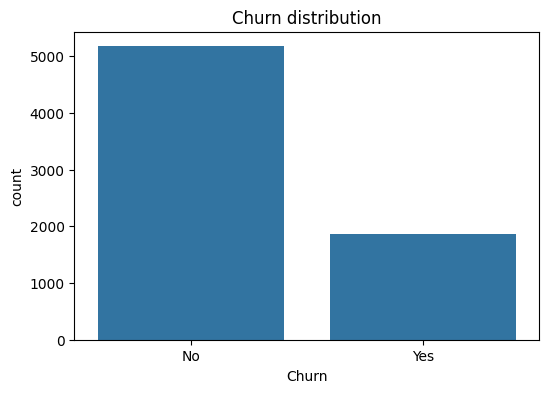

In [6]:
if 'Churn' in df.columns:
    display(df['Churn'].value_counts(normalize=True))
    plt.figure(figsize=(6,4))
    sns.countplot(x='Churn', data=df)
    plt.title('Churn distribution')
    plt.show()
else:
    print('No Churn column found')


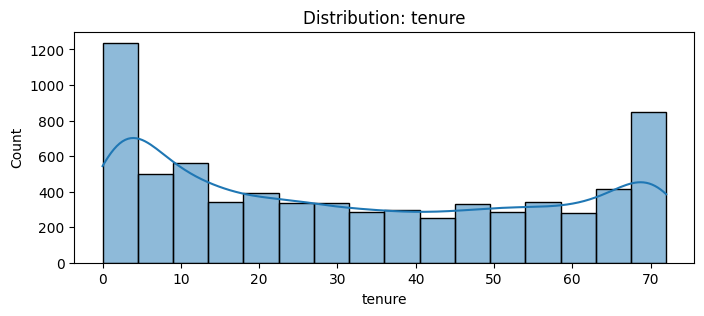

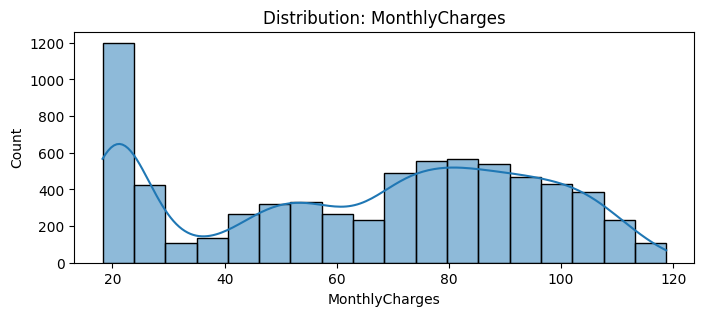

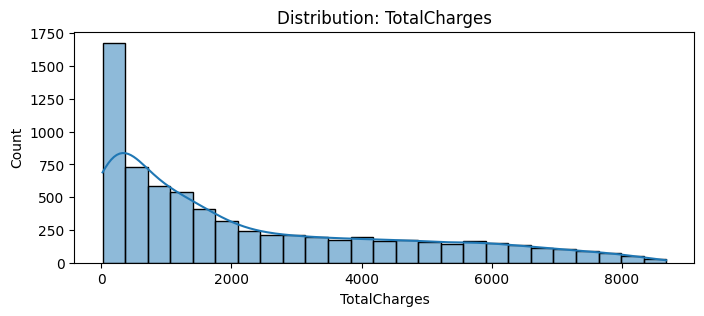

In [7]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']
for c in num_cols:
    if c in df.columns:
        plt.figure(figsize=(8,3))
        sns.histplot(df[c].dropna(), kde=True)
        plt.title(f'Distribution: {c}')
        plt.show()


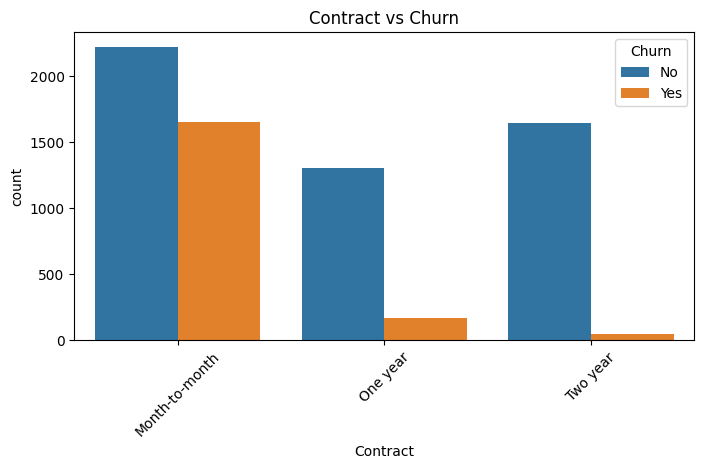

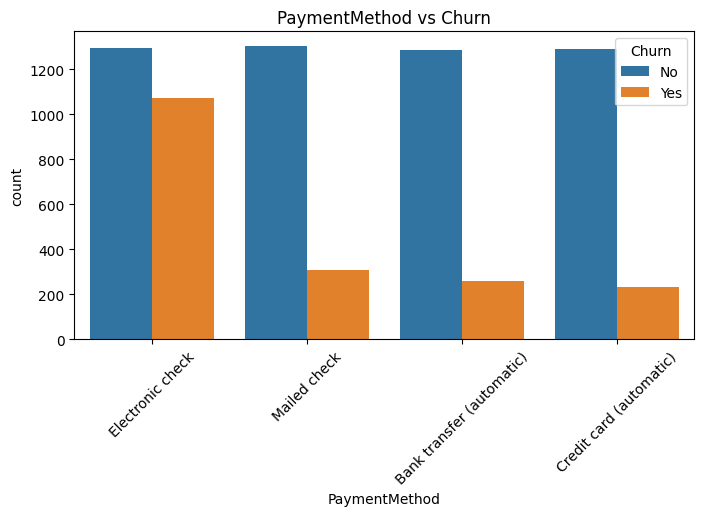

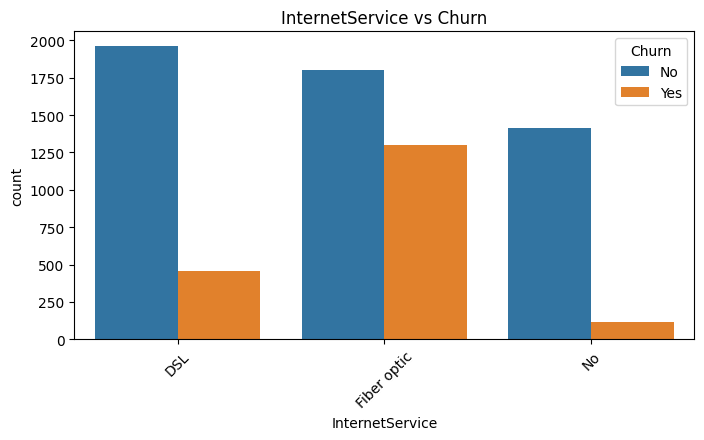

In [8]:
for c in ['Contract','PaymentMethod','InternetService']:
    if c in df.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(x=c, hue='Churn', data=df)
        plt.title(f'{c} vs Churn')
        plt.xticks(rotation=45)
        plt.show()


## Notes / Next steps
- Investigate nulls in `TotalCharges` and decide strategy
- Convert categorical columns to consistent type
- Move cleaning to `02_data_cleaning_preprocessing.ipynb` and then to `src/` functions
